In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_excel('Concrete_Data.xls')

In [41]:
df.columns = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarse', 'fine', 'age', 'strength']

In [42]:
df = df.sample(frac=1).reset_index(drop=True)

In [43]:
df.head()

,cement,slag,ash,water,superplasticizer,coarse,fine,age,strength
0,359.00,19.00,141.00,154.00,10.91,942.0,801.00,3,25.116626
1,250.20,166.80,0.00,203.50,0.00,977.6,694.10,7,19.350144
2,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,56,39.148447
3,200.00,0.00,0.00,180.00,0.00,1125.0,845.00,7,7.839342
4,540.00,0.00,0.00,173.00,0.00,1125.0,613.00,28,67.306647


In [44]:
df.shape

(1030, 9)

In [45]:
# Check for missing values
df.isna().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarse              0
fine                0
age                 0
strength            0
dtype: int64

In [46]:
# Check for duplicates
df.duplicated().sum()

25

In [47]:
# remove duplicates
df = df.drop_duplicates()

In [48]:
y = df['strength'].values
X = df.drop('strength', axis=1).values

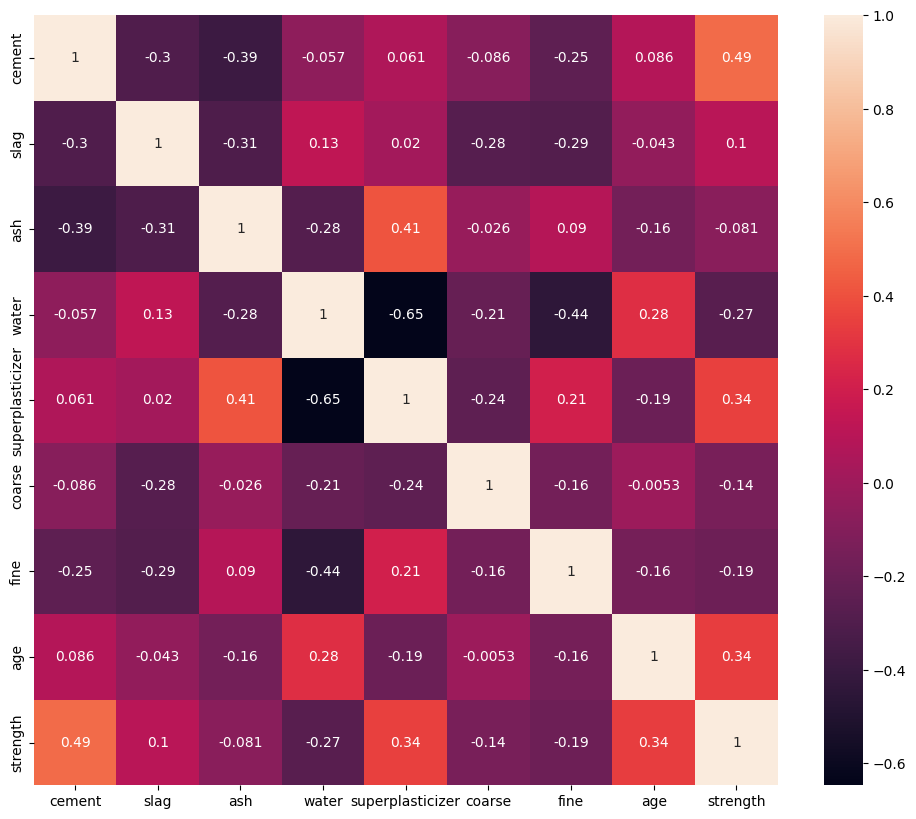

In [49]:
# correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

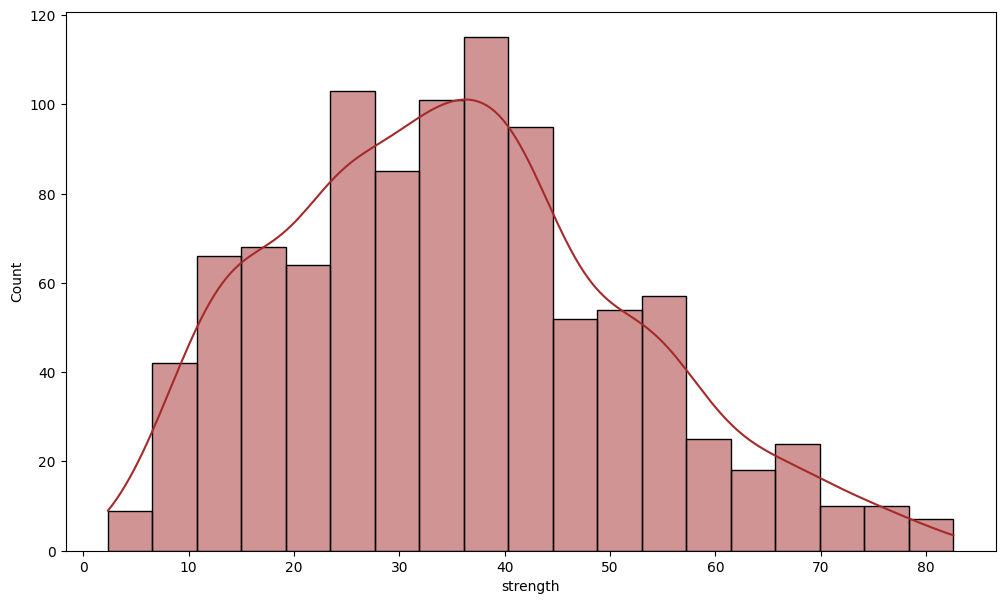

In [50]:
# visualize the distribution of the target variable
plt.figure(figsize=(12, 7))
sns.histplot(df['strength'], color='brown', kde=True)
plt.show()

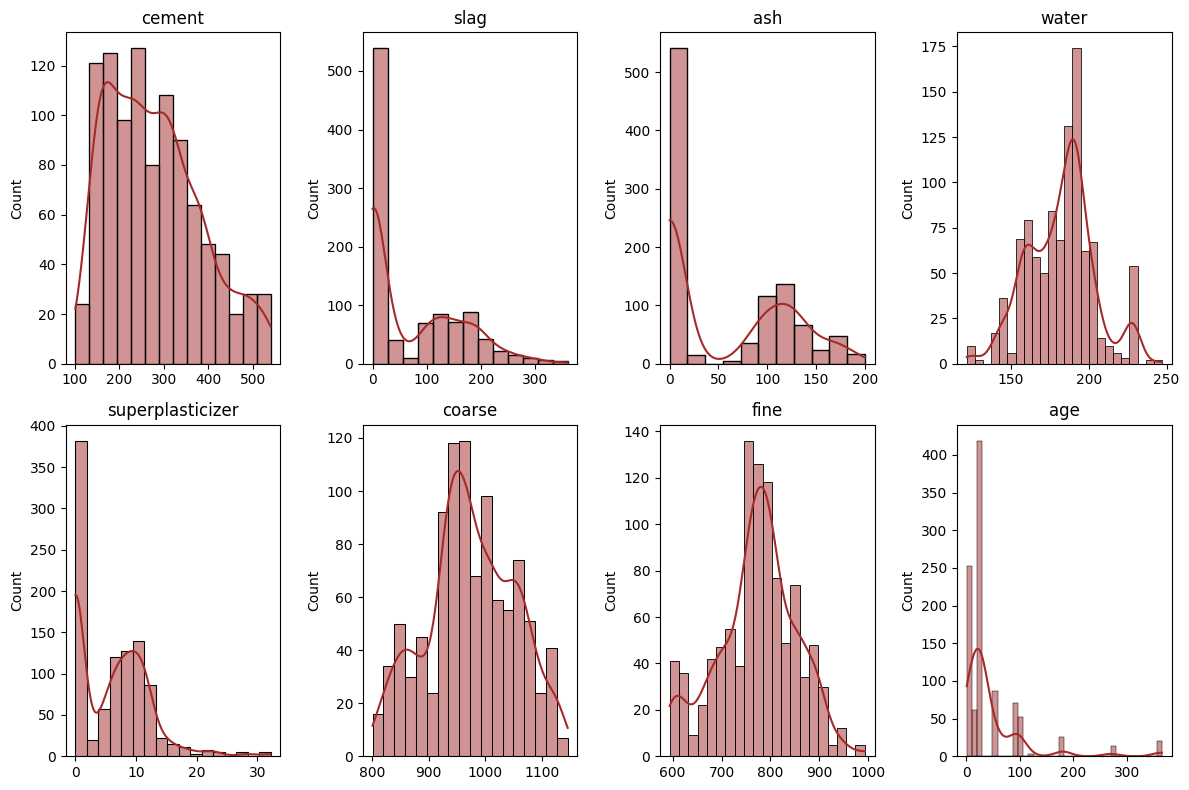

In [51]:
# visualize the distribution of the features
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    sns.histplot(X[:, i], kde=True, color='brown', ax=ax)
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

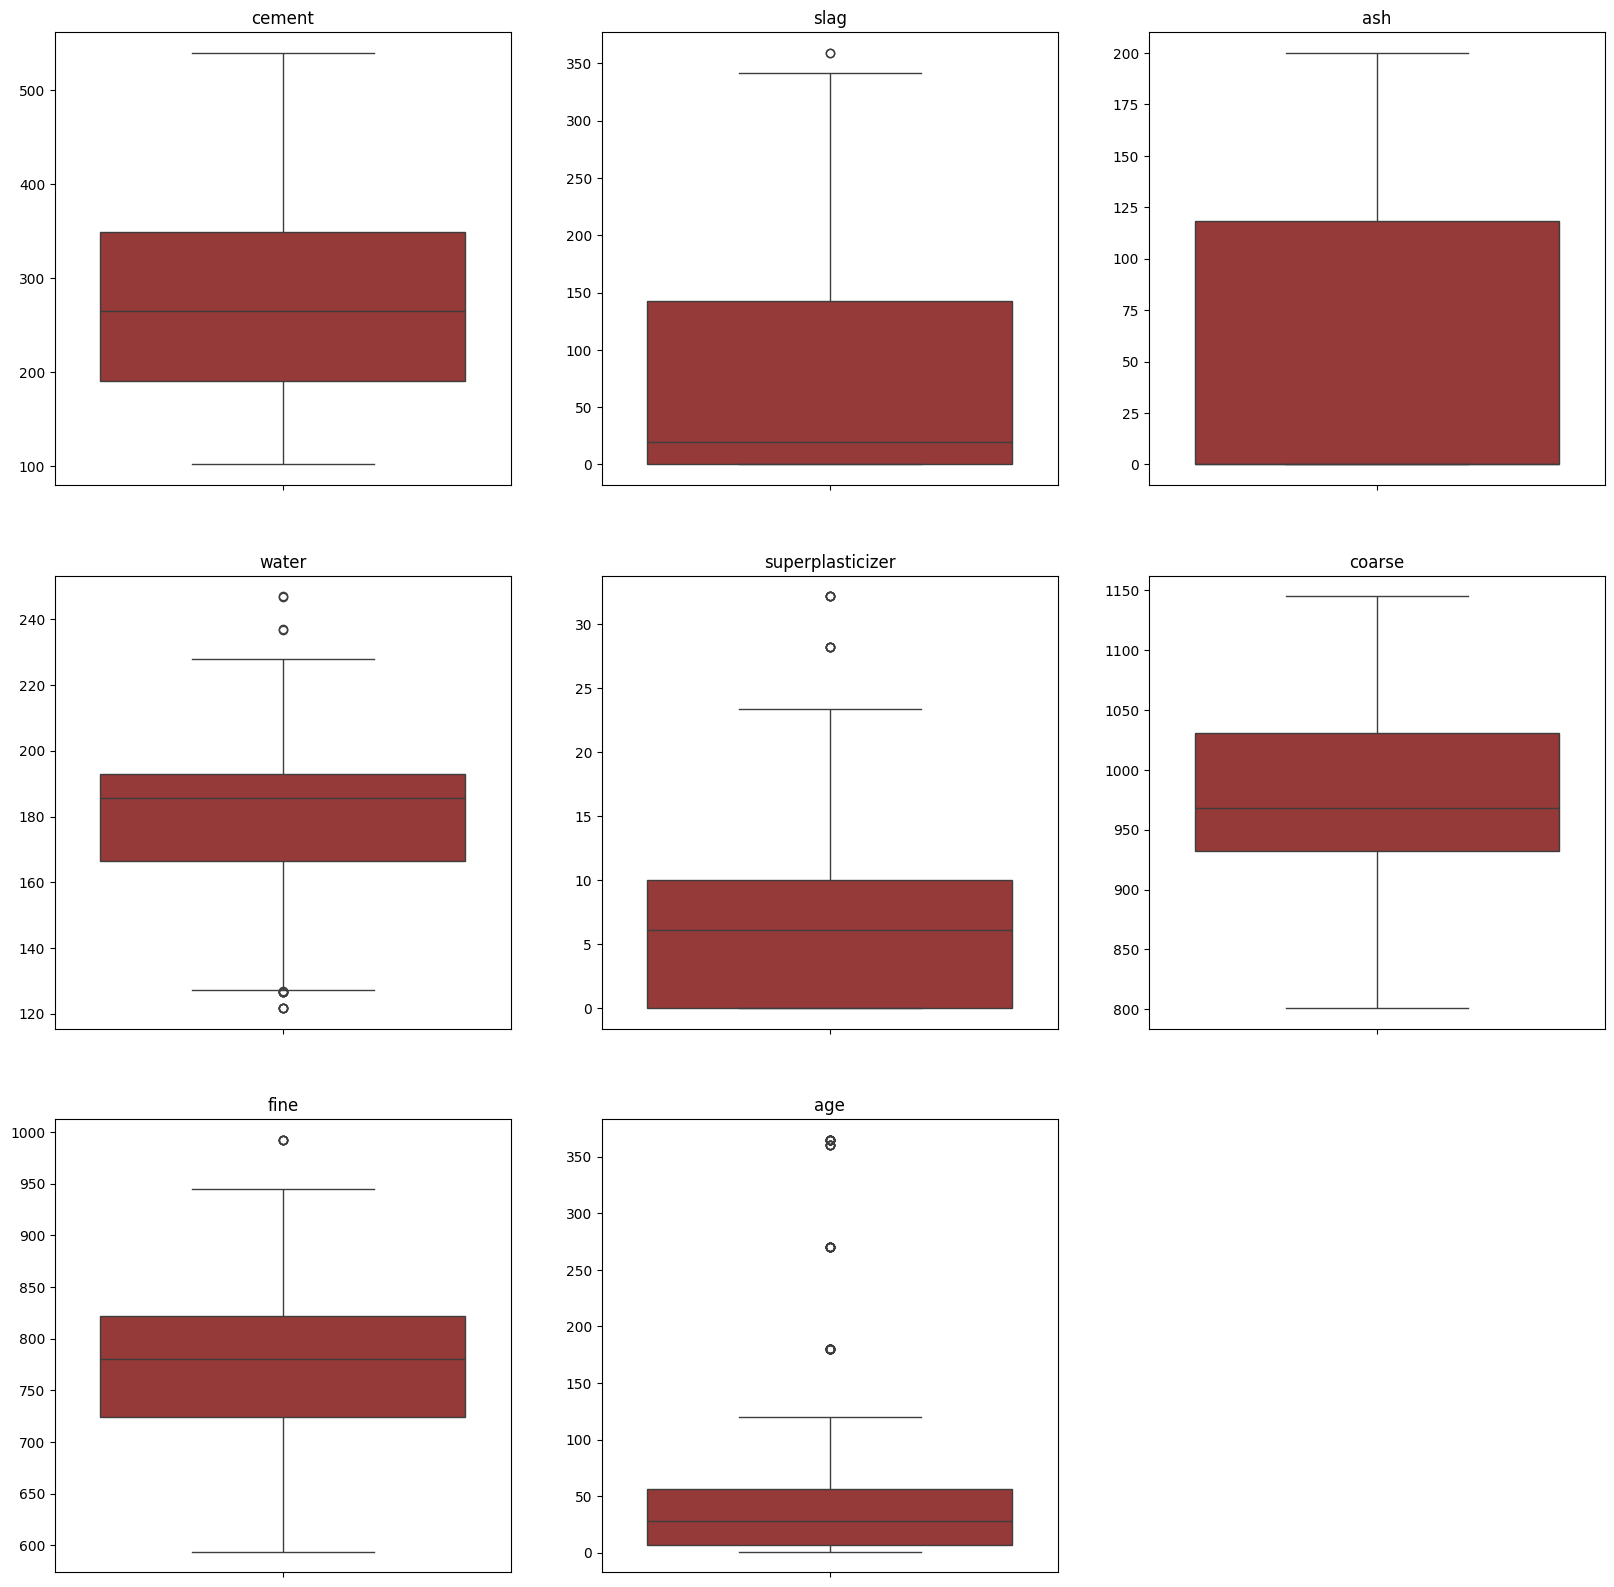

In [52]:
# boxplot of the features
plt.figure(figsize=(20, 20))
for i in range(8):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=X[:, i], color='brown')
    plt.title(df.columns[i])

In [53]:
# export the cleaned data
df.to_csv('cleaned_concrete_data.csv', index=False)